# **Casos de Uso**
## Grupo 3
## Módulo: Análisis Exploratorio y Estadística

# <font color='blue'>__Caso de uso : Yisella Carrasco__</font>
## ***Caracterización población extranjera en Chile, Región de antofagasta, año 2022***

En el análisis ecónomico usamos constantemente bases de datos para generar información que aporte a la toma de decisiones para el sector público y privado. En este sentido, en los últimos años ha estado sobre la mesa del debate la caracterización de la población extranjera en nuestro país. Utilizaré una base de datos pública para realizar una primera aproximación al conocimiento de la población extranjera en Antofagasta para el año 2022. En capstone anteriores hemos revisado esta base en torno a datos numéricos, esta vez aplicaremos visualizaciones.

In [ ]:
# Importar pandas
import pandas as pd

#Se monta el drive en colab y llama la base
from google.colab import drive
drive.mount('/content/drive')
BASE_2022 = '/content/drive/MyDrive/base-2022-comunas.csv'

# Carga el archivo CSV en un DataFrame
df = pd.read_csv(BASE_2022, encoding='ISO-8859-1')

Mounted at /content/drive


In [ ]:
#información sobre los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123986 entries, 0 to 123985
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEXO            123986 non-null  object 
 1   EDAD            123986 non-null  object 
 2   PAIS            123986 non-null  object 
 3   AÑO ESTIMACION  123986 non-null  int64  
 4   REGION          120391 non-null  object 
 5   COMUNA          123986 non-null  object 
 6   CENSO AJUSTADO  113813 non-null  float64
 7   RRAA_REGULAR    74611 non-null   float64
 8   RRAA_IRREGULAR  20375 non-null   float64
 9   RRAA_TOTAL      76931 non-null   float64
 10  ESTIMACION      123986 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 10.4+ MB


In [ ]:
#Los datos importados contienen 11 columnas de información, ya que quiero hacer un
#análisis por región eliminaré las columnas que no contengan esta información
# Eliminar las filas donde la columna REGION tenga valores nulos o vacíos
df = df.dropna(subset=['REGION', 'ESTIMACION'])
#también eliminaré las que tienen "región ignorada" (AGREGUÉ ESTE PUNTO DESPUES DE UN ANÁLISIS DONDE VI QUE ESTA CATEGORÍA EXISTÍA)
df = df[df['REGION'] != 'REGIÓN IGNORADA']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117181 entries, 1 to 123985
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEXO            117181 non-null  object 
 1   EDAD            117181 non-null  object 
 2   PAIS            117181 non-null  object 
 3   AÑO ESTIMACION  117181 non-null  int64  
 4   REGION          117181 non-null  object 
 5   COMUNA          117181 non-null  object 
 6   CENSO AJUSTADO  110303 non-null  float64
 7   RRAA_REGULAR    68529 non-null   float64
 8   RRAA_IRREGULAR  16355 non-null   float64
 9   RRAA_TOTAL      70479 non-null   float64
 10  ESTIMACION      117181 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 10.7+ MB


In [ ]:
display(df.head(10))

SEXO     EDAD      PAIS  AÑO ESTIMACION                     REGION  \
1     H  00 A 04  ALEMANIA            2018                   COQUIMBO   
2     H  00 A 04  ALEMANIA            2018                      MAULE   
3     H  00 A 04  ALEMANIA            2018  METROPOLITANA DE SANTIAGO   
4     H  00 A 04  ALEMANIA            2018  METROPOLITANA DE SANTIAGO   
5     H  00 A 04  ALEMANIA            2018  METROPOLITANA DE SANTIAGO   
6     H  00 A 04  ALEMANIA            2018  METROPOLITANA DE SANTIAGO   
7     H  00 A 04  ALEMANIA            2018  METROPOLITANA DE SANTIAGO   
8     H  00 A 04  ALEMANIA            2018  METROPOLITANA DE SANTIAGO   
9     H  00 A 04  ALEMANIA            2018  METROPOLITANA DE SANTIAGO   
10    H  00 A 04  ALEMANIA            2018  METROPOLITANA DE SANTIAGO   

              COMUNA  CENSO AJUSTADO  RRAA_REGULAR  RRAA_IRREGULAR  \
1          LA SERENA             2.0           NaN             NaN   
2             CURICÓ             1.0           NaN             NaN   
3   ESTACIÓN CENTRAL             1.0           NaN             NaN   
4         LAS CONDES             3.0           NaN             NaN   
5       LO BARNECHEA             3.0           NaN             NaN   
6          PEÑALOLÉN             1.0           NaN             NaN   
7        PROVIDENCIA             3.0           NaN             NaN   
8        SAN JOAQUÍN             1.0           NaN             NaN   
9           SANTIAGO             2.0           NaN             NaN   
10          VITACURA             6.0           NaN             NaN   

    RRAA_TOTAL  ESTIMACION  
1          NaN           2  
2          NaN           1  
3          NaN           1  
4          NaN           3  
5          NaN           3  
6          NaN           1  
7          NaN           3  
8          NaN           1  
9          NaN           2  
10         NaN           6

Inicialmente, realizaremos la visualización de un gráfico de línea para observar la evolución de la población migrante entre los años 2018 y 2022

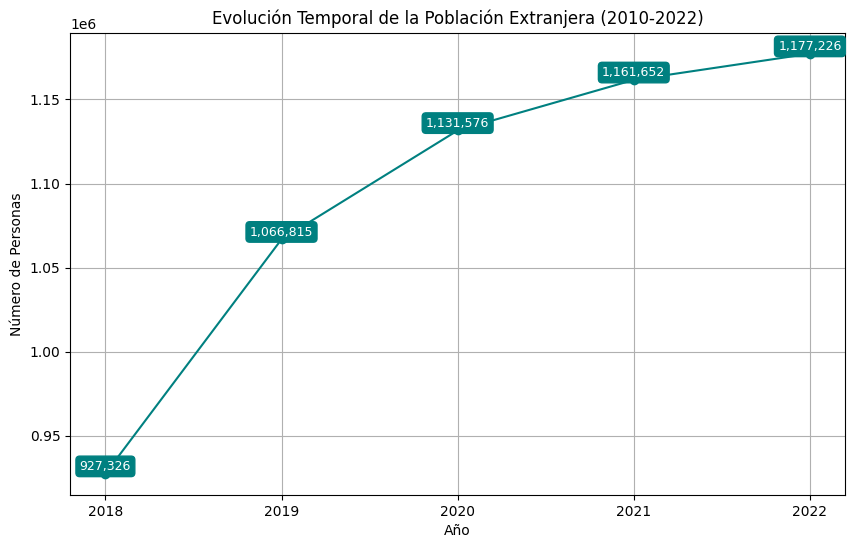

In [ ]:
# Agrupación por año sin filtro de región
evolucion = df.groupby('AÑO ESTIMACION')['ESTIMACION'].sum()

# Visualización
plt.figure(figsize=(10, 6))
plt.plot(evolucion.index, evolucion.values, marker='o', linestyle='-', color='teal')
plt.title('Evolución Temporal de la Población Extranjera (2010-2022)')
plt.xlabel('Año')
plt.ylabel('Número de Personas')

# Formatear los ticks del eje X para que no aparezcan decimales
plt.xticks(ticks=evolucion.index, labels=[int(x) for x in evolucion.index])

# Agregar etiquetas con los valores de cada punto más arriba, formateadas con punto de miles
for i, v in enumerate(evolucion.values):
    plt.text(evolucion.index[i], v + 500, f'{v:,.0f}', ha='center', va='bottom', fontsize=9,
             color='white', bbox=dict(facecolor='teal', edgecolor='teal', boxstyle='round,pad=0.3'))

plt.grid(True)
plt.show()


Antes de visualizar el análisis por región, vemos que es lo que está ocurriendo en el país, en este sentido es fácil identificar que la población extranjera en nuestro país ha ido aumentando significativamente en los últimos años, sin embargo, el mayor aumento se visualiza entre los años 2018 y 2019 y el manor aumento para el periodo 2021-2022. Lo cual se puede explicar por diversas leyes y programas aplicados en esta fecha como la ley de migración y extrnajería, esta nueva ley de migración fue aprobada el 11 de abril de 2021, reemplazando la Ley de Extranjería de 1975, así como el fortalecimiento del control fronterizo y la alianza con países como Perú, Ecuador y Colombia para abordar la migración irregular y coordinar acciones para enfrentar los flujos migratorios

Para el año 2022, veremos como se distribuye la población migrante según regiones, lo que nos puede ayudar a identificar cómo se distribuye la población a través del territorio nacional.

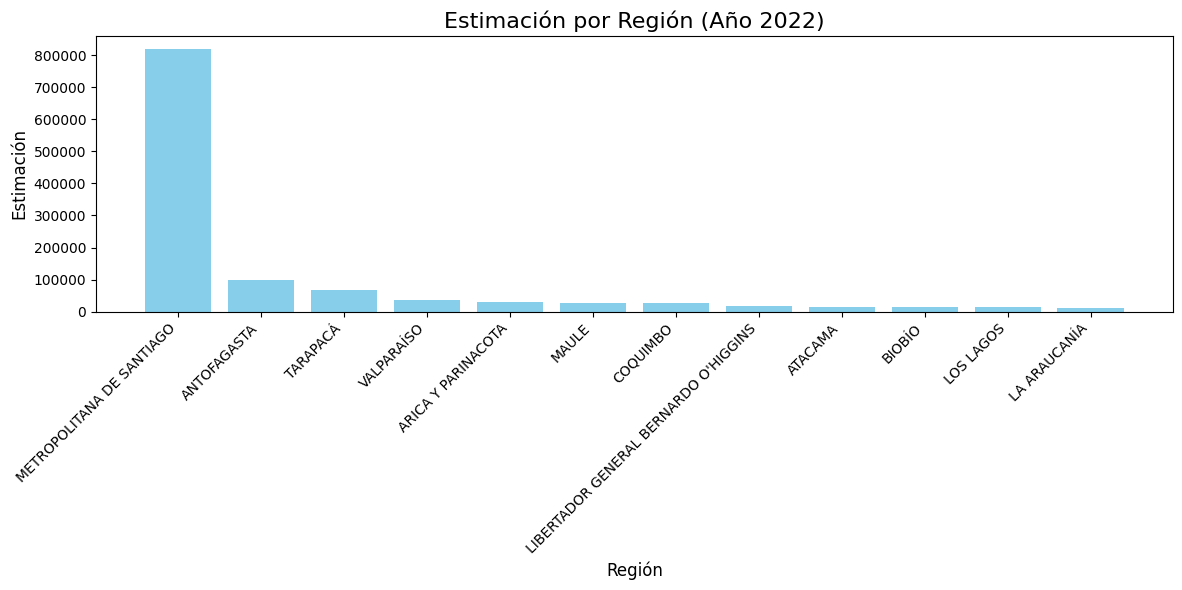

In [ ]:
import matplotlib.pyplot as plt

# Convertir la agrupación a un DataFrame para facilitar la manipulación
agrupacion_2022_df = agrupacion_2022.reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(agrupacion_2022_df['REGION'], agrupacion_2022_df['ESTIMACION'], color='skyblue')

# Personalizar el gráfico
plt.title('Estimación por Región (Año 2022)', fontsize=16)
plt.xlabel('Región', fontsize=12)
plt.ylabel('Estimación', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

La región Metropolitana es la que concentra el mayor numero de pesonas migrantes para el año 2022, mientras que, Antofagasta se encuentra en el segundo lugar, seguido por Tarapacá. En tanto, la región de La Araucanía es la que presenta el menor número de personas extranjeras

Veremos la evolución de la población migrante a tarvés de los años 2018-2022 para la región en análisis que es Antofagasta

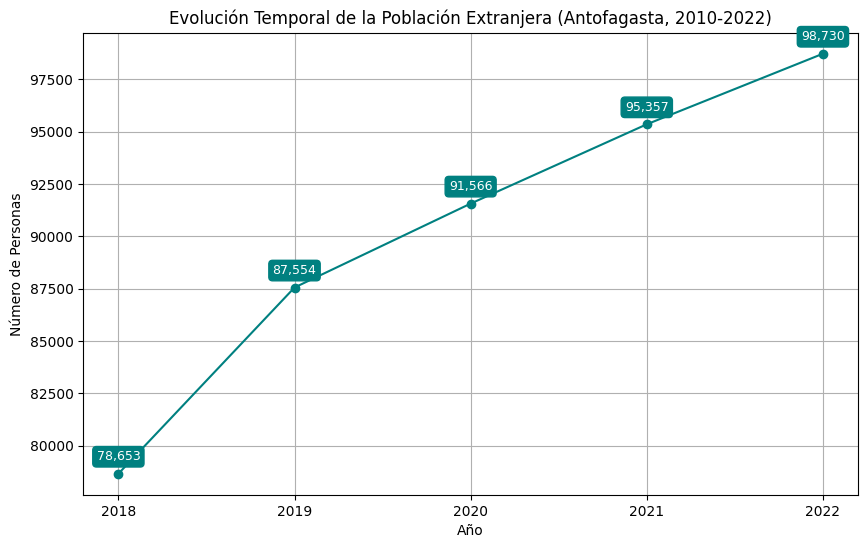

In [ ]:
# Agrupación por año
evolucion = df[df['REGION'] == 'ANTOFAGASTA'].groupby('AÑO ESTIMACION')['ESTIMACION'].sum()

# Visualización
plt.figure(figsize=(10, 6))
plt.plot(evolucion.index, evolucion.values, marker='o', linestyle='-', color='teal')
plt.title('Evolución Temporal de la Población Extranjera (Antofagasta, 2010-2022)')
plt.xlabel('Año')
plt.ylabel('Número de Personas')

# Formatear los ticks del eje X para que no aparezcan decimales
plt.xticks(ticks=evolucion.index, labels=[int(x) for x in evolucion.index])

# Agregar etiquetas con los valores de cada punto más arriba, formateadas con punto de miles
for i, v in enumerate(evolucion.values):
    plt.text(evolucion.index[i], v + 500, f'{v:,.0f}', ha='center', va='bottom', fontsize=9,
             color='white', bbox=dict(facecolor='teal', edgecolor='teal', boxstyle='round,pad=0.3'))

plt.grid(True)
plt.show()


Antofagasta muestra un comportamiento similar a lo que ocurre a nivel país, siendo el mayor salto entre los años 2018 y 2019 y el menor entre los años 2021-2022.

Ahora, ¿cómo se caracteriza la población migrante en la región de antofagasta?

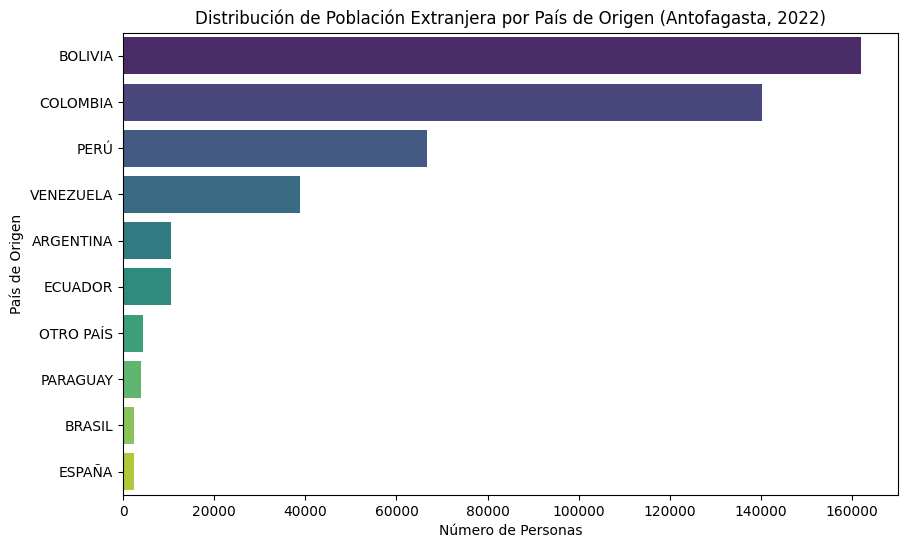

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Agrupación por país y suma de estimación
extranjeros_pais = df[df['REGION'] == 'ANTOFAGASTA'].groupby('PAIS')['ESTIMACION'].sum().sort_values(ascending=False).head(10)

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(y=extranjeros_pais.index, x=extranjeros_pais.values, hue=extranjeros_pais.index, palette='viridis', legend=False)
plt.title('Distribución de Población Extranjera por País de Origen (Antofagasta, 2022)')
plt.xlabel('Número de Personas')
plt.ylabel('País de Origen')
plt.show()

Para el año 2022 el mayor número de migrantes posee nacionalidad boliviana, seguido de las personas provenientes de Colombiana y, en tercer lugar, se encuentra Perú.

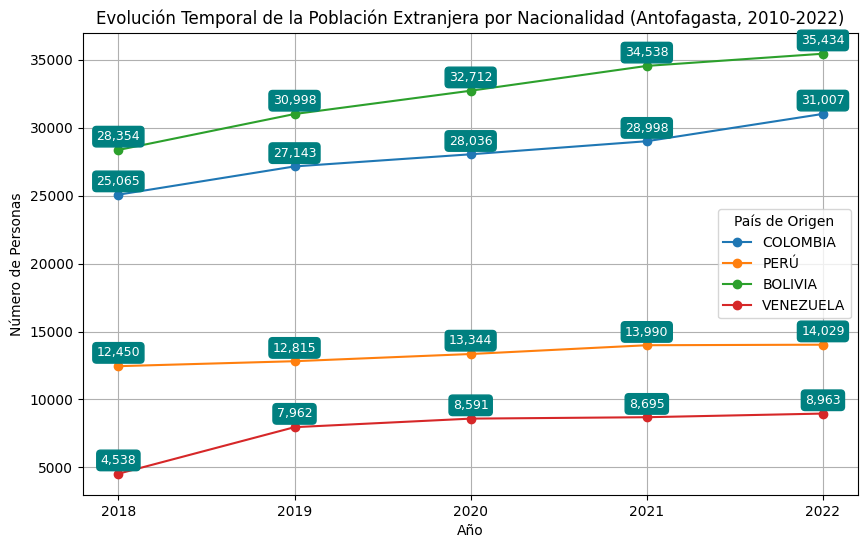

In [ ]:
import matplotlib.pyplot as plt

# Filtrar los datos para la región de Antofagasta y para los países de interés
paises_interes = ['COLOMBIA', 'PERÚ', 'BOLIVIA', 'VENEZUELA']

# Crear la figura
plt.figure(figsize=(10, 6))

# Graficar las líneas para cada país
for pais in paises_interes:
    evolucion_pais = df[(df['REGION'] == 'ANTOFAGASTA') & (df['PAIS'] == pais)].groupby('AÑO ESTIMACION')['ESTIMACION'].sum()
    plt.plot(evolucion_pais.index, evolucion_pais.values, marker='o', label=pais)

# Título y etiquetas
plt.title('Evolución Temporal de la Población Extranjera por Nacionalidad (Antofagasta, 2010-2022)')
plt.xlabel('Año')
plt.ylabel('Número de Personas')

# Formatear los ticks del eje X para que no aparezcan decimales
plt.xticks(ticks=evolucion_pais.index, labels=[int(x) for x in evolucion_pais.index])

# Agregar etiquetas con los valores de cada punto más arriba, formateadas con punto de miles
for pais in paises_interes:
    evolucion_pais = df[(df['REGION'] == 'ANTOFAGASTA') & (df['PAIS'] == pais)].groupby('AÑO ESTIMACION')['ESTIMACION'].sum()
    for i, v in enumerate(evolucion_pais.values):
        plt.text(evolucion_pais.index[i], v + 500, f'{v:,.0f}', ha='center', va='bottom', fontsize=9,
                 color='white', bbox=dict(facecolor='teal', edgecolor='teal', boxstyle='round,pad=0.3'))

# Agregar leyenda
plt.legend(title="País de Origen")

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()


Al mirar la evolución de los migrantes de las cuatro nacionalidades vemos que los que han presentado el mayor aumento son las personas de nacionalidad Bolivina y Colombiana, mientras que las personas de Perú y Venezuela han tenido aumentos menos significativos en los últimos años. Esta información nos ayuda a caracterizar a la población migrante de nuestra región y poder derribar mitos en torno a lo que se cree.

# <font color='blue'>__Caso de uso : Raúl Muñoz__</font>
## ***Muestreo biológico para el área de calidad en la pesca industrial***

En el contexto de la pesca industrial, el área de calidad juega un papel crucial para garantizar la seguridad y la calidad del producto final que llega al consumidor. El muestreo biológico es una herramienta fundamental para este propósito, ya que permite obtener información clave sobre las características de las especies capturadas y su estado de salud.

**Importancia del muestreo biológico para el área de calidad:**
- **Controlar la calidad de la materia prima:** El muestreo permite verificar que las especies capturadas cumplan con los requisitos de tamaño, peso y estado de madurez establecidos por la empresa y las regulaciones pesqueras.
- **Cumplir con las normativas de seguridad alimentaria:** Los análisis microbiológicos realizados en las muestras permiten asegurar que el producto esté libre de patógenos y toxinas que puedan representar un riesgo para la salud del consumidor.
- **Mejorar los procesos de producción:** La información obtenida del muestreo biológico puede utilizarse para identificar puntos críticos en la cadena de producción y tomar medidas para mejorar la eficiencia y la calidad del producto final.
- **Generar información para la trazabilidad:** Los datos del muestreo, junto con la información sobre la zona de pesca, la fecha de captura y la embarcación, contribuyen a la trazabilidad del producto, permitiendo un mejor control y seguimiento en caso de detectar algún problema.

In [13]:
from google.colab import drive
import pandas as pd

# Montar Google Drive
drive.mount('/content/drive')

# Ruta del archivo CSV en Google Drive
archivo_csv = '/content/drive/MyDrive/BITACORA - Grupo 3/03 ANALISIS EXPLORATORIO Y ESTADISTICA/Archivos/muestreo_biologico_2024.csv'

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(archivo_csv)

# Convertir la columna "Fecha de recepción" a datetime
df['Fecha de recepción'] = pd.to_datetime(df['Fecha de recepción'])

# Verificar valores faltantes
print('Verificacion de nulos')
print(df.isnull().sum())
print('\n Información general del DataFrame')
display(df.info())

display(df.sample(5))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Verificacion de nulos
Especie               0
Talla (cm)            0
Peso (gr)             0
Integridad (%)        0
pH                    0
Temperatura (°C)      0
Planta                0
Puerto                0
Flota                 0
Nombre nave pesca     0
Zona pesca            0
Fecha de recepción    0
dtype: int64

 Información general del DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Especie             1000 non-null   object        
 1   Talla (cm)          1000 non-null   float64       
 2   Peso (gr)           1000 non-null   float64       
 3   Integridad (%)      1000 non-null   int64         
 4   pH                  1000 non-null   float64       
 5   Temperatu

None

Especie  Talla (cm)   Peso (gr)  Integridad (%)        pH  \
546    Caballa   23.224188  310.106627              76  5.327398   
854      Jurel   22.806221  662.485126              77  5.255199   
964      Jurel   38.521676  567.048853              81  6.797614   
670    Caballa   28.312395  266.667517              89  5.939456   
476  Anchoveta   14.626427   89.964549              70  5.320081   

     Temperatura (°C)    Planta       Puerto      Flota Nombre nave pesca  \
546         21.254134  Planta 2    Pesca Sur  Artesanal         Francesca   
854         23.447115  Planta 1  Pesca Norte  Artesanal             Isaac   
964         21.891407  Planta 2  Pesca Norte  Artesanal          Licanten   
670         29.140689  Planta 2    Pesca Sur  Artesanal           Liliana   
476         25.928410  Planta 2    Pesca Sur  Artesanal         Isidora I   

     Zona pesca Fecha de recepción  
546         143         2024-06-23  
854         145         2024-12-01  
964         104         2024-09-09  
670         118         2024-07-14  
476         109         2024-08-16

Se observa que existen 1000 filas y todos completados sin valores nulos
* **Especie**: Nombre de la especie (e.g., Anchoveta, Sardina española).
* **Talla (cm) y Peso (gr)**: Medidas físicas de los especímenes.
* **Integridad (%)**: Estado de conservación como un porcentaje.
* **pH y Temperatura (°C)**: Parámetros fisicoquímicos.
* **Planta, Puerto, Flota, y Nombre nave pesca**: Datos logísticos.
* **Zona pesca**: Zona identificada con un número.
* **Fecha de recepción**: Fecha en formato AAAA-MM-DD.

**Importar y limpiar los datos:**

In [14]:
# Convertir la fecha a formato datetime para análisis temporal
df["Fecha de recepción"] = pd.to_datetime(df["Fecha de recepción"])
df["mes"] = df["Fecha de recepción"].dt.month

# Convertir 'Planta' a un tipo de dato categórico
df['Planta'] = df['Planta'].astype('category')

# Codificar 'Planta' numéricamente
df['Planta_encoded'] = df['Planta'].cat.codes

display(df.sample(5))



Especie  Talla (cm)   Peso (gr)  Integridad (%)        pH  \
718           Caballa   25.837836  292.504564              85  6.083371   
327         Anchoveta   11.595680   71.734333              98  6.135659   
607         Anchoveta   10.908289  107.244423              92  6.427574   
598  Sardina española   20.963498  154.296328              81  6.802540   
921         Anchoveta   17.043709  109.811758              74  5.003220   

     Temperatura (°C)    Planta       Puerto       Flota Nombre nave pesca  \
718         26.628250  Planta 1    Pesca Sur   Artesanal            Emilia   
327         21.373519  Planta 2  Pesca Norte  Industrial           Liliana   
607         24.897306  Planta 2    Pesca Sur  Industrial          Licanten   
598         25.068833  Planta 2  Pesca Norte  Industrial         Francesca   
921         27.741677  Planta 1  Pesca Norte  Industrial            Emilia   

     Zona pesca Fecha de recepción  mes  Planta_encoded  
718         156         2024-01-24    1               0  
327         121         2024-08-22    8               1  
607         105         2024-07-09    7               1  
598         127         2024-09-17    9               1  
921         122         2024-06-03    6               0

In [15]:
df.describe()

Talla (cm)    Peso (gr)  Integridad (%)           pH  \
count  1000.000000  1000.000000     1000.000000  1000.000000   
mean     26.317252   309.925155       84.513000     5.982812   
min       5.988644    12.096229       70.000000     5.001347   
25%      17.293120   106.499284       77.000000     5.458574   
50%      24.432670   212.113316       85.000000     5.976750   
75%      34.533949   524.802403       92.000000     6.486865   
max      58.598209   940.429307       99.000000     6.999315   
std      10.719162   250.656424        8.767137     0.580629   

       Temperatura (°C)   Zona pesca          Fecha de recepción          mes  \
count       1000.000000  1000.000000                        1000  1000.000000   
mean          24.990154   130.113000  2024-07-04 00:17:16.800000     6.612000   
min           20.011361   101.000000         2024-01-01 00:00:00     1.000000   
25%           22.511341   115.000000         2024-04-11 00:00:00     4.000000   
50%           24.873857   130.000000         2024-07-07 00:00:00     7.000000   
75%           27.604453   145.000000         2024-09-29 00:00:00     9.000000   
max           29.995524   159.000000         2024-12-30 00:00:00    12.000000   
std            2.914815    17.139545                         NaN     3.358383   

       Planta_encoded  
count      1000.00000  
mean          1.00000  
min           0.00000  
25%           0.00000  
50%           1.00000  
75%           2.00000  
max           2.00000  
std           0.81527

El resumen estadístico revela lo siguiente:

**Talla y peso:**
* La talla promedio es de ~26.3 cm, con un rango de 5.9  58.5 cm.
* El peso promedio es de ~309.9 g, con una alta desviación estándar debido a valores extremos (máximo 940 g).

**Integridad:**
* La mayoría de los especímenes tienen una integridad alta, con una mediana del 85%.

**pH y temperatura:**
* El pH varía entre 5.0 y 7.0, con un promedio cercano a 6.
* La temperatura promedio es ~25°C, con un rango entre 20°C y 30°C.

**Zona pesca:**
*Las zonas tienen una distribución entre 101 y 159.

**Análisis descriptivo:**

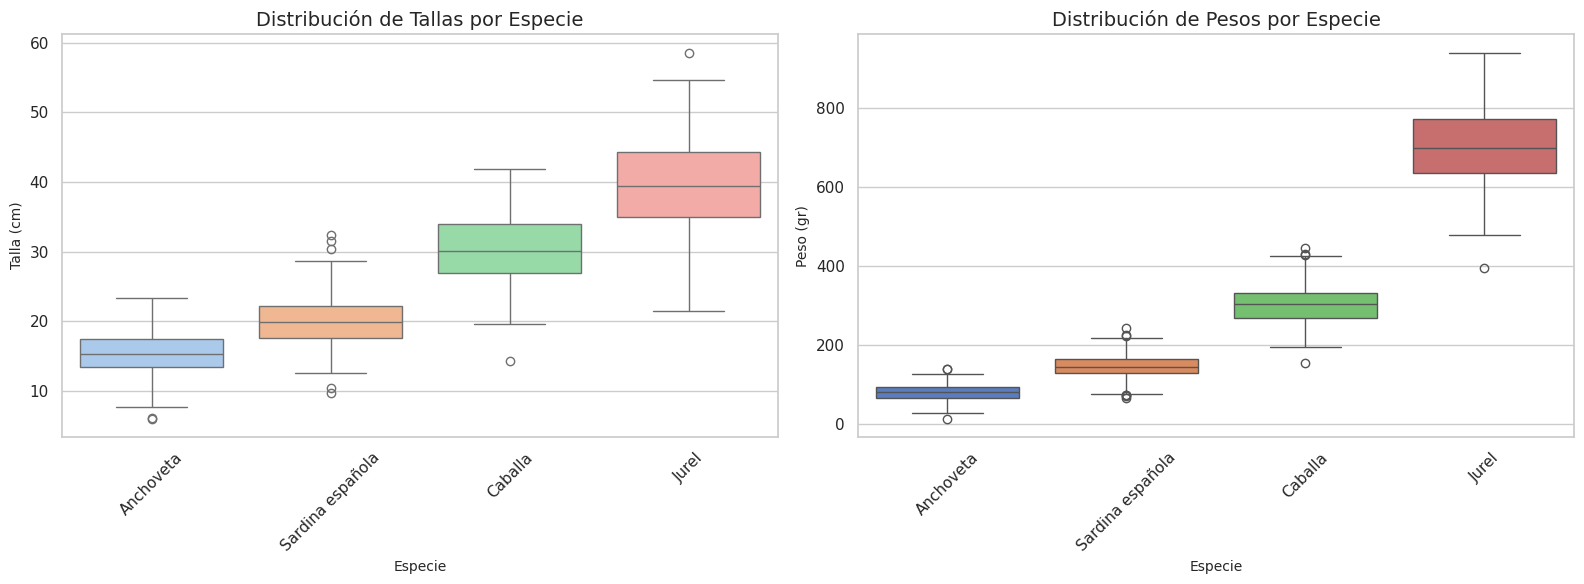

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el estilo de seaborn
sns.set_theme(style="whitegrid")

# Crea figura con dos gráficos en una fila
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Gráfico 1: Distribución de tallas por especie
sns.boxplot(data=df, x="Especie", y="Talla (cm)", hue="Especie", palette="pastel", dodge=False, ax=axes[0])
axes[0].set_title("Distribución de Tallas por Especie", fontsize=14)
axes[0].set_xlabel("Especie", fontsize=10)
axes[0].set_ylabel("Talla (cm)", fontsize=10)
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend([], [], frameon=False)

# Gráfico 2: Distribución de pesos por especie
sns.boxplot(data=df, x="Especie", y="Peso (gr)", hue="Especie", palette="muted", dodge=False, ax=axes[1])
axes[1].set_title("Distribución de Pesos por Especie", fontsize=14)
axes[1].set_xlabel("Especie", fontsize=10)
axes[1].set_ylabel("Peso (gr)", fontsize=10)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend([], [], frameon=False)

# Ajuste del diseño para mejor visualización
plt.tight_layout()
plt.show()


Los gráficos muestran algunos valores atípicos (outliers), especialmente en el jurel, que podrían indicar errores de medición o individuos con características inusuales.

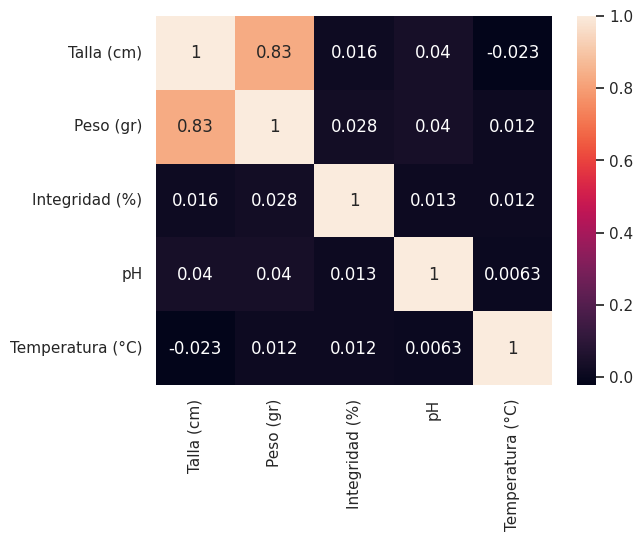

In [17]:
# Matriz de correlación
corr_matrix = df[["Talla (cm)", "Peso (gr)", "Integridad (%)", "pH", "Temperatura (°C)"]].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

**Visualización y análisis:**

Distribución de tallas y pesos por especie:
- La Sardina española presenta una mayor variabilidad tanto en talla como en peso.
- La Anchoveta tiene tallas y pesos menores en comparación con otras especies.

**Relación entre talla y peso:**
- Existe una correlación positiva: los especímenes más grandes tienden a ser más pesados.
- Cada especie muestra una tendencia única, reflejando diferencias biológicas.


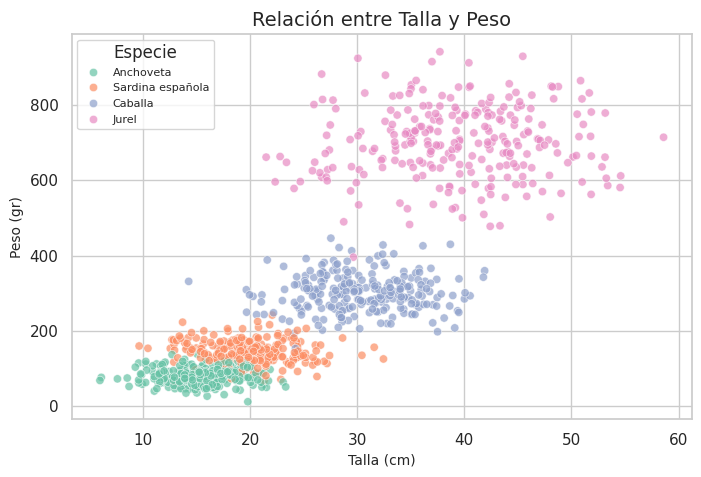

In [18]:
# Exploracion 2: Relación entre peso y talla
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Talla (cm)", y="Peso (gr)", hue="Especie", palette="Set2", alpha=0.7)
plt.title("Relación entre Talla y Peso", fontsize=14)
plt.xlabel("Talla (cm)", fontsize=10)
plt.ylabel("Peso (gr)", fontsize=10)
plt.legend(title="Especie", fontsize=8)
plt.show()

**Relación general entre talla y peso**

Se observa una clara correlación positiva entre la talla (cm) y el peso (gr) de los peces. Esto significa que, en general, a medida que aumenta la talla de un pez, también aumenta su peso. Este patrón es esperable y consistente con el crecimiento natural de los peces.

**Diferencias entre especies**

- **Jurel:** Los jureles tienden a ser los más grandes y pesados, con una mayor dispersión en sus datos, lo que indica una mayor variabilidad en sus tallas y pesos.
- **Caballa:** Las caballas se ubican en un rango intermedio de tallas y pesos, mostrando una relación más estrecha entre ambas variables.
- **Anchoveta y Sardina española:** Ambas especies presentan las tallas y pesos más pequeños. La anchoveta muestra una ligera tendencia a tener mayor peso para una misma talla en comparación con la sardina española.

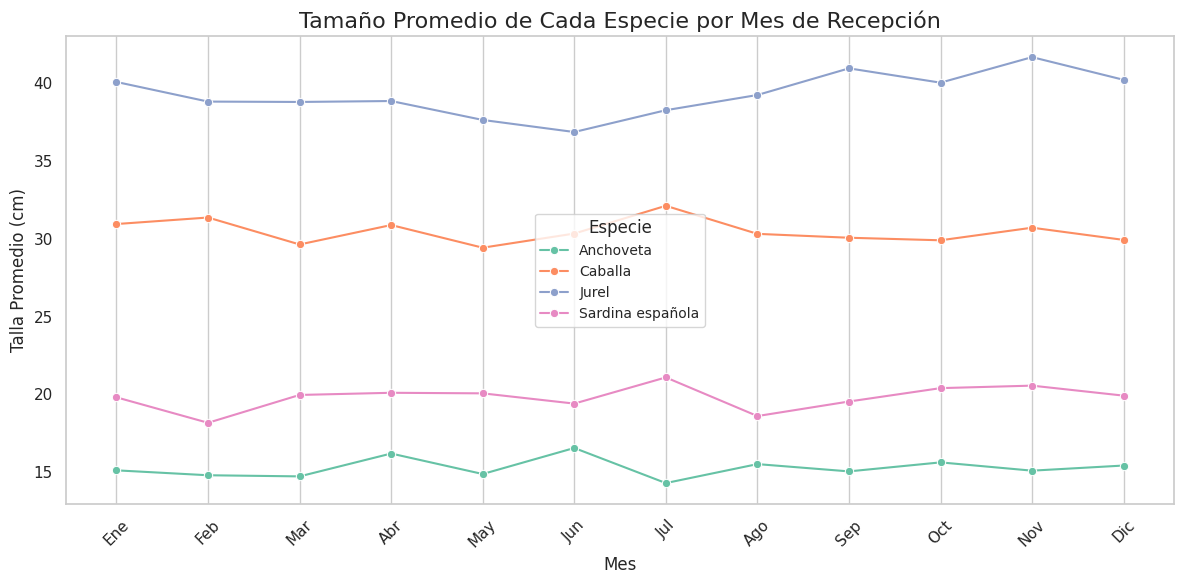

In [19]:
# Extraer el mes de la fecha de recepción
df['Mes'] = df['Fecha de recepción'].dt.month

# Calcular el tamaño promedio por especie y mes
talla_por_mes = df.groupby(['Especie', 'Mes'])['Talla (cm)'].mean().reset_index()

# Graficar el tamaño promedio por especie y mes usando líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=talla_por_mes, x='Mes', y='Talla (cm)', hue='Especie', marker='o', palette='Set2')
plt.title("Tamaño Promedio de Cada Especie por Mes de Recepción", fontsize=16)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Talla Promedio (cm)", fontsize=12)
plt.legend(title="Especie", fontsize=10)
plt.xticks(ticks=range(1, 13), labels=[
    "Ene", "Feb", "Mar", "Abr", "May", "Jun",
    "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"
], rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

1. **Tendencias generales**

- **Jurel**: Mantiene un tamaño promedio relativamente estable a lo largo del año, con un ligero aumento en los meses de invierno (Junio - Agosto). Es la especie de mayor tamaño en promedio durante todo el año.
- **Caballa**: Muestra una tendencia similar al jurel, con un tamaño promedio estable y un ligero incremento en invierno. Su tamaño promedio se ubica entre el jurel y las otras dos especies.
- **Anchoveta**: Presenta mayor variabilidad en su tamaño promedio a lo largo del año, con un pico en Agosto y un tamaño menor en los meses de primavera (Septiembre - Noviembre).
- **Sardina española**: Es la especie de menor tamaño en promedio. Su tamaño se mantiene relativamente estable, con un ligero aumento en los meses de verano (Diciembre - Febrero).

2. **Comparación entre especies**

El jurel es la especie de mayor tamaño en promedio durante todo el año, seguida por la caballa.
La anchoveta y la sardina española presentan los tamaños promedio más pequeños, con la anchoveta mostrando mayor variabilidad a lo largo del año.

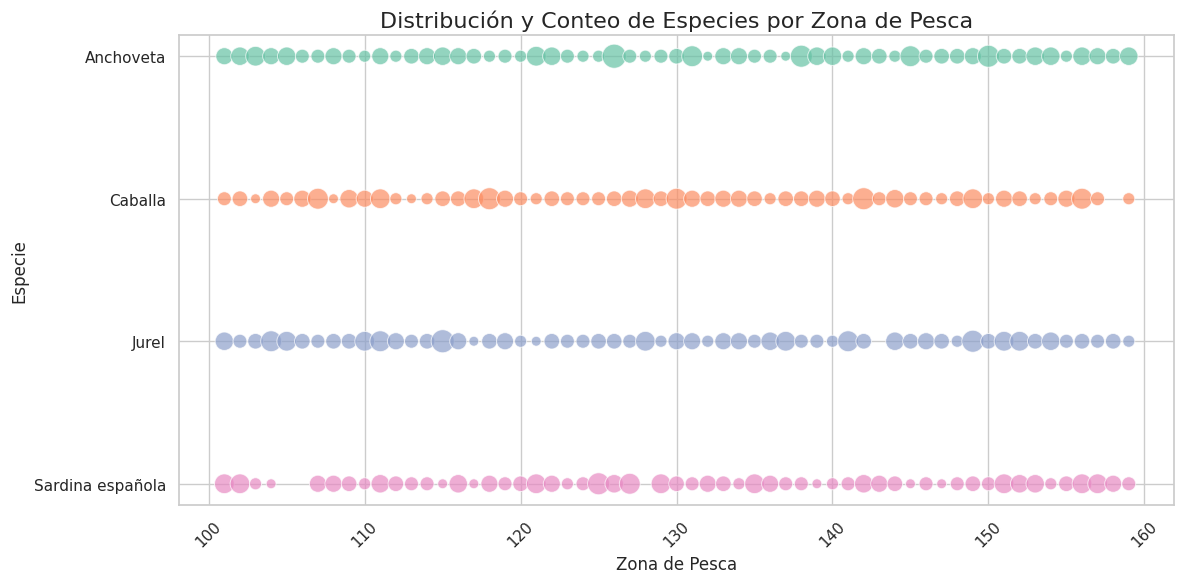

In [20]:
# Contar el número de ocurrencias de cada especie en cada zona de pesca
conteo_especies_zonas = df.groupby(['Zona pesca', 'Especie']).size().reset_index(name='Conteo')

# Graficar el conteo de especies por zona de pesca
plt.figure(figsize=(12, 6))
sns.scatterplot(data=conteo_especies_zonas, x='Zona pesca', y='Especie', size='Conteo', hue='Especie',
                palette='Set2', sizes=(50, 300), alpha=0.7, legend=None)

plt.title("Distribución y Conteo de Especies por Zona de Pesca", fontsize=16)
plt.xlabel("Zona de Pesca", fontsize=12)
plt.ylabel("Especie", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El gráfico muestra la distribución y conteo de especies por zona de pesca.  Cada punto representa una muestra de una especie en una zona de pesca específica. A simple vista, podemos observar lo siguiente:

- **Amplia distribución:** Las cuatro especies (anchoveta, caballa, jurel y sardina española) se encuentran distribuidas en un rango amplio de zonas de pesca, aproximadamente entre las zonas 100 y 160.
- **Presencia en todas las zonas:** las especies están presentes en la mayoría, si no en todas, las zonas de pesca dentro del rango mencionado. No se observan zonas donde alguna especie esté completamente ausente.
- **Diferencias en la abundancia:** Aunque las cuatro especies están presentes en la mayoría de las zonas, podrían existir diferencias en su abundancia relativa. Por ejemplo, la anchoveta y la caballa parecen tener una mayor cantidad de muestras en general, lo que podría indicar una mayor abundancia en comparación con el jurel y la sardina española.
- **Sin patrón claro de agrupación:** No se observa un patrón claro de agrupación de especies por zona de pesca.


# <font color='blue'>**Caso de uso: Hugo Tapia**</font>

## ***Gráfica de Mapa de Calor para precios de energía mayorista en mercado eléctrico***

El propósito de este caso de uso es crear una visualización del precio de energía en el mercado mayorista de electricidad del Sistema Eléctrico Nacional. Este precio se denomina **"costo marginal"** y se calcula con una periodicidad de 15 minutos.

Actualmente, la web de la empresa (www.coordinador.cl) muestra en su página principal la información de costo marginal mediante un gráfico de líneas, para 8 barras principales del sistema, pero para una persona no experta es difícil de interpretar.

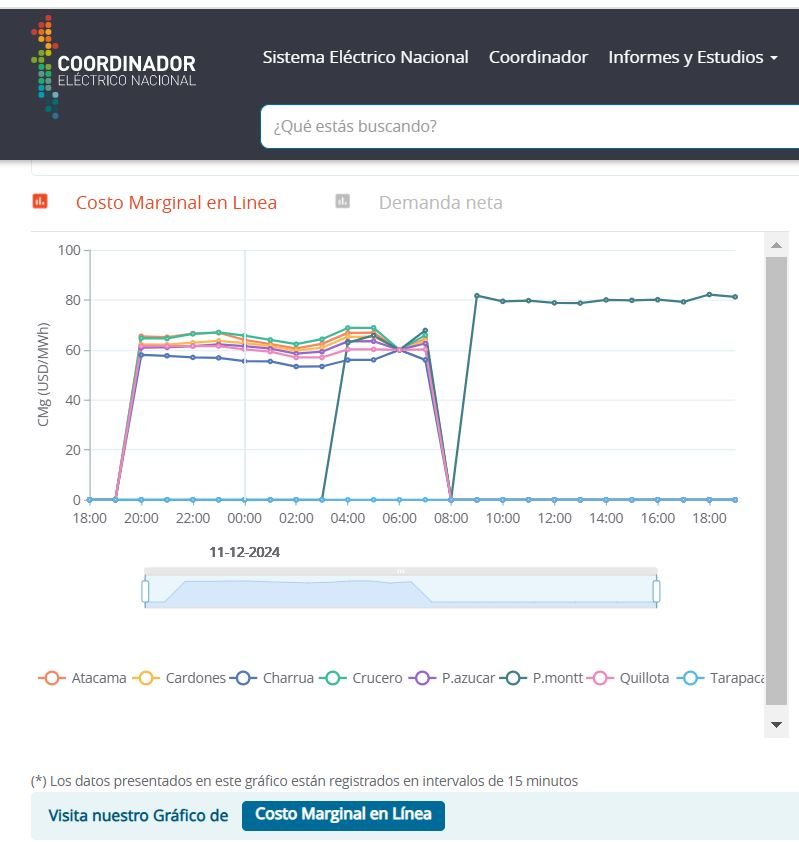

Este precio es relevante porque es el precio al que transan la energía los generadores que inyectan su producción de energía en el sistema, y que a su vez efectúan retiros para clientes finales como empresas distribuidoras y grandes clientes libres.

Este precio depende de muchas variables, tales como la situación hidrológica del sistema, la disponibilidad y precios de combustibles, el nivel del consumo, y las restricciones de capacidad que pueden existir en la red de transmisión.

En este caso de uso, se hace uso de la librería `geopandas` vista en la ayudantía para generar un mapa de calor para los precios promedios que se vieron en el sistema para las 14 regiones que forman el SEN (desde Arica hasta Isla de Chiloé).

Para ello, se divide el día en 3 bloques horarios:
* Bloque A: De 00:00 a 8:00 horas
* Bloque B: De 8:00 a 18:00 horas
* Bloque C: De 18:00 a 24:00 horas

A continuación se registra el proceso seguido para generar las gráficas.

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt


In [ ]:
# Se lee archivo que tiene los precios promedio por Bloque y Barra del Sistema
# A este archivo se le incorporó un campo con el Código Regional (codregion)
df=pd.read_csv('/content/drive/MyDrive/03 Analisis Exploratorio y Estadistica/Regiones/CMg.csv', delimiter=';')
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1851 entries, 0 to 1850
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nombre_barra  1851 non-null   object 
 1   Bloque        1851 non-null   object 
 2   cmg_promedio  1851 non-null   float64
 3   codregion     1851 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 58.0+ KB


count       mean        std  min        25%        50%  \
cmg_promedio  1851.0  64.873125  27.475663  0.0  38.475637  79.747301   
codregion     1851.0   7.515397   4.344634  1.0   4.000000   7.000000   

                    75%         max  
cmg_promedio  85.099483  109.929952  
codregion     13.000000   16.000000

Este dataset tiene 1851 registros.

In [ ]:
#A partir de este dataset, se calculan 3 dataset (uno para cada bloque horario) con los Precios Promedios por Región:

df_grouped = df.groupby(['codregion','Bloque'])['cmg_promedio'].mean().reset_index()

df_grouped_A = df_grouped[df_grouped['Bloque'] == 'A']
df_grouped_B = df_grouped[df_grouped['Bloque'] == 'B']
df_grouped_C = df_grouped[df_grouped['Bloque'] == 'C']

df_grouped_A

codregion Bloque  cmg_promedio
0           1      A     87.672123
3           2      A     84.687279
6           3      A     80.466427
9           4      A     80.674411
12          5      A     79.158602
15          6      A     83.327631
18          7      A     79.734880
21          8      A     77.153393
24          9      A     72.795759
27         10      A     69.982313
30         13      A     80.011648
33         14      A     70.059388
36         15      A     87.398418
39         16      A     78.902284

Cada uno de estos dataset tiene 14 registros.

Por otra parte, de la Biblioteca del Congreso descargamos el Mapa Vectorial de la División Regional de Chile, y filtramos aquellas regiones comprendidas entre Arica e Isla de Chiloé.

In [ ]:
#Lee archivo coordenadas regionales
archivo_shp = "/content/drive/MyDrive/03 Analisis Exploratorio y Estadistica/Regiones/Regional.shp"
gdf = gpd.read_file(archivo_shp)
gdf = gdf[gdf.codregion.isin([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16])]
print(gdf)

    objectid  cir_sena  codregion        area_km    st_area_sh    st_length_  \
0       1084         1         15   16866.819844  1.886869e+10  7.505296e+05   
1       1085         2          1   42284.567484  4.830637e+10  1.213713e+06   
2       1086         3          2  126071.431981  1.508452e+11  2.516112e+06   
5       1089         4          3   75661.248635  9.643906e+10  2.401741e+06   
6       1090         5          4   40575.901682  5.498082e+10  2.065933e+06   
7       1091         6          5   16322.970393  2.301475e+10  1.679609e+06   
8       1092         7         13   15392.030737  2.225204e+10  1.064253e+06   
9       1093        13         10   48408.371357  8.771834e+10  7.874158e+06   
10      1094        12         14   18245.080563  3.108661e+10  1.844423e+06   
11      1095        11          9   31837.567634  5.221507e+10  1.501025e+06   
12      1096        10          8   24021.621594  3.817612e+10  2.097147e+06   
13      1097        10         16   1310

En este punto creamos los 3 archivos de datos para graficar, efectuando una operación `merge` entre este archivo de coordenadas geográficas y los set de precios por región - bloque horario:

In [ ]:
#Prepara archivos para graficar
resultado_gdf_A = gdf.merge(df_grouped_A,on="codregion",how="inner")
resultado_gdf_B = gdf.merge(df_grouped_B,on="codregion",how="inner")
resultado_gdf_C = gdf.merge(df_grouped_C,on="codregion",how="inner")
resultado_gdf_A

objectid  cir_sena  codregion        area_km    st_area_sh    st_length_  \
0       1084         1         15   16866.819844  1.886869e+10  7.505296e+05   
1       1085         2          1   42284.567484  4.830637e+10  1.213713e+06   
2       1086         3          2  126071.431981  1.508452e+11  2.516112e+06   
3       1089         4          3   75661.248635  9.643906e+10  2.401741e+06   
4       1090         5          4   40575.901682  5.498082e+10  2.065933e+06   
5       1091         6          5   16322.970393  2.301475e+10  1.679609e+06   
6       1092         7         13   15392.030737  2.225204e+10  1.064253e+06   
7       1093        13         10   48408.371357  8.771834e+10  7.874158e+06   
8       1094        12         14   18245.080563  3.108661e+10  1.844423e+06   
9       1095        11          9   31837.567634  5.221507e+10  1.501025e+06   
10      1096        10          8   24021.621594  3.817612e+10  2.097147e+06   
11      1097        10         16   13104.413231  2.037630e+10  1.074094e+06   
12      1098         9          7   30321.890658  4.596943e+10  1.388328e+06   
13      1099         8          6   16349.029957  2.409028e+10  9.848526e+05   

                                      Region  \
0               Región de Arica y Parinacota   
1                         Región de Tarapacá   
2                      Región de Antofagasta   
3                          Región de Atacama   
4                         Región de Coquimbo   
5                       Región de Valparaíso   
6           Región Metropolitana de Santiago   
7                        Región de Los Lagos   
8                         Región de Los Ríos   
9                     Región de La Araucanía   
10                        Región del Bío-Bío   
11                           Región de Ñuble   
12                          Región del Maule   
13  Región del Libertador Bernardo O'Higgins   

                                             geometry Bloque  cmg_promedio  
0   POLYGON ((-7727277.278 -1997230.768, -7726464....      A     87.398418  
1   MULTIPOLYGON (((-7810213.515 -2298008.28, -781...      A     87.672123  
2   MULTIPOLYGON (((-7870470.961 -2985679.186, -78...      A     84.687279  
3   MULTIPOLYGON (((-7932747.768 -3311218.615, -79...      A     80.466427  
4   MULTIPOLYGON (((-7963268.9 -3784870.143, -7963...      A     80.674411  
5   MULTIPOLYGON (((-8991645.917 -3991821.789, -89...      A     79.158602  
6   POLYGON ((-7873736.745 -3885505.642, -7873695....      A     80.011648  
7   MULTIPOLYGON (((-8331768.181 -5403721.402, -83...      A     69.982313  
8   MULTIPOLYGON (((-8206761.21 -4900095.562, -820...      A     70.059388  
9   POLYGON ((-8101075.126 -4521676.016, -8101101....      A     72.795759  
10  MULTIPOLYGON (((-8231985.748 -4624218.142, -82...      A     77.153393  
11  POLYGON ((-8053806.54 -4431488.942, -8053866.3...      A     78.902284  
12  POLYGON ((-8018823.211 -4121471.456, -8018820....      A     79.734880  
13  MULTIPOLYGON (((-8002300.862 -4023671.372, -80...      A     83.327631

Finalmente creamos los 3 gráficos de mapa de calor, correspondientes a los 3 bloques horarios por región:

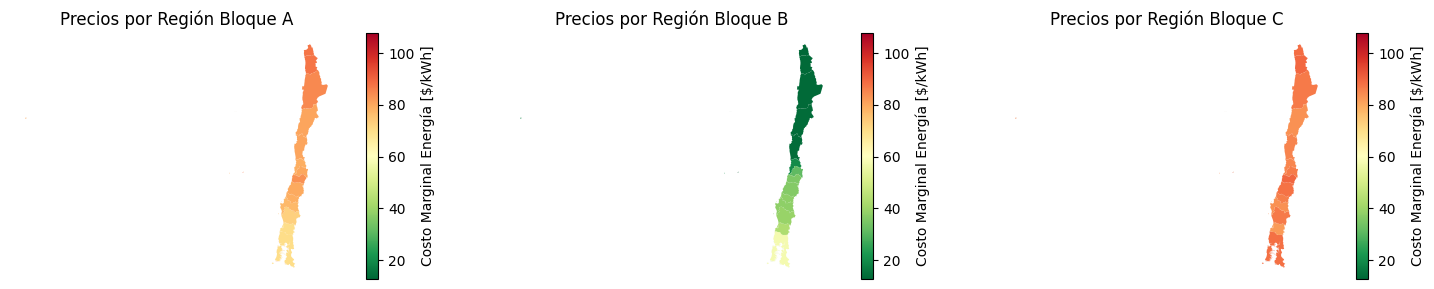

In [ ]:
from urllib.parse import scheme_chars
# Creamos los mapas

fig, ax = plt.subplots(1, 3, figsize=(15, 3))

# Fijamos una escala que depende de los datos del dataset, y es común a los 3 gráficos:
vmin= df_grouped.cmg_promedio.min()
vmax= df_grouped.cmg_promedio.max()*1.2

resultado_gdf_A.plot(column='cmg_promedio', ax=ax[0], cmap='RdYlGn_r', legend=True, legend_kwds={'label': "Costo Marginal Energía [$/kWh]",'orientation': "vertical"}, vmin= vmin, vmax= vmax)
ax[0].set_title('Precios por Región Bloque A')
ax[0].set_axis_off()

resultado_gdf_B.plot(column='cmg_promedio', ax=ax[1], cmap='RdYlGn_r', legend=True,legend_kwds={'label': "Costo Marginal Energía [$/kWh]",'orientation': "vertical"}, vmin= vmin, vmax= vmax)
ax[1].set_title('Precios por Región Bloque B')
ax[1].set_axis_off()

resultado_gdf_C.plot(column='cmg_promedio', ax=ax[2], cmap='RdYlGn_r', legend=True,legend_kwds={'label': "Costo Marginal Energía [$/kWh]",'orientation': "vertical"}, vmin= vmin, vmax= vmax)
ax[2].set_title('Precios por Región Bloque C')
ax[2].set_axis_off()


plt.tight_layout()
plt.show()

Este proceso se ha aplicado a valores promedios de precios en el horizonte de un mes, pero podría implementarse para un revisión diaria de los valores de costos marginales.

Lo anterior permite a los diversos agentes del mercado obetener información relevante sobre las condiciones de operacipon del sistema y sus efectos económicos, sin tener que recurrir al análsis de las extensas tablas de datos.

Por ejemplo, alguna las conclusiones que se obtienen de los gráficos son:
* Durante los bloque Noche y Madrugada (C y A), los precios observados no varían demasiado entre las diversas regiones.
* Los precios en la noche son más altos que durante el día, a pesar de que el consumo de energia es menor.
* Ello se debe a que en el bloque día (B) existe una sobreoferta de energía fotovoltaica y eólica en la zona norte del país, que por límites en la capacidad de las redes de transmisión, no logra aprovecharse completamnente para abastecer consumos en la zona centro-sur. Debido a ello, se observa que el nivel de precios es bajo desde la quinta región al norte, y es medio en la zona centro-sur.
* En la décima región existe otro problema de transmisión que produce precios más altos que los del resto del país.

De este modo, este prototipo puede implementarse para ser escalado, mejorado y automatizado, entregando información relevante y de calidad al mercado.

# <font color='blue'>__Caso de uso : Begoña Urtubia__</font>

## ***Análisis Exploratorio de datos ambientales públicos de SNIFA***


El Servicio de Evaluación Ambiental (SEA) es quien se encarga de evaluar y aprobar proyectos que pueden tener afectación ambiental, así como fiscalizar el cumplimiento de los compromisos ambientales .

Cuanto un proyecto obtiene una calificación ambiental favorable por parte del SEA, se obtiene una Resolución de Calificación Ambiental (RCA).  Este documento establece las condiciones, exigencias o medidas que el titular asociado a un proyecto o actividad deberá cumplir durante su ejecución.

Dentro de las exigencias que el SEA que puede pedir esta el compromiso por parte de la empresa o institución a quien se le aprueba el proyecto de monitorear y reportar cada cierta frecuencia algunos parámetros fisicoquímicos con el fin verificar que no sobrepasen umbrales aceptables. Estos reportes son de caracter público y se pueden descargar desde la pagina web del Sistema Nacional de Información de Fiscalización Ambiental (SNIFA).

A continuación, se obtienen y preparan algunos datos ambientales de [RILES](https://snifa.sma.gob.cl/DatosAbiertos) reportados desde el año 2017 a lo largo de todo Chile.

### Obtención y preparación de los datos

Los datos públicos de RILES son descargados y guardados en una carpeta del Drive desde donde se leen. LOs archivos vienen el formato `.csv` y es un archivo por mes.

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Montamos nuestro drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ruta de la carpeta que contiene los archivos CSV
carpeta = '/content/drive/MyDrive/BITACORA - Grupo 3/02 OBTENCION Y PREPARACION DE DATOS/OD99_Archivos'

# Obtener la lista de archivos en la carpeta
archivos = os.listdir(carpeta)

# Iterar sobre los archivos y leerlos con Pandas
dataframes = []
for archivo in archivos:
    if archivo.endswith('.csv'):
        ruta_completa = os.path.join(carpeta, archivo)
        df = pd.read_csv(ruta_completa)
        dataframes.append(df)

# Concatenar todos los dataframes en uno solo
df_final = pd.concat(dataframes, ignore_index=True)

<ipython-input-3-48b9aae27ecb>:12: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_completa)
<ipython-input-3-48b9aae27ecb>:12: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_completa)
<ipython-input-3-48b9aae27ecb>:12: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_completa)
<ipython-input-3-48b9aae27ecb>:12: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_completa)
<ipython-input-3-48b9aae27ecb>:12: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_completa)
<ipython-input-3-48b9aae27ecb>:12: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read

Obtenemos información general del DataFrame resultante,así como sus columnas y una muestra de cómo se ven sus datos.

In [ ]:
# Obtenemos información general del DataFrame resultante
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4198674 entries, 0 to 4198673
Data columns (total 30 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   PeriodoInforme           object 
 1   RUT                      object 
 2   RazonSocial              object 
 3   Planta                   object 
 4   PuntoDeDescarga          object 
 5   CuerpoReceptor           object 
 6   Norma                    object 
 7   Muestra                  int64  
 8   MuestraParametro_Codigo  int64  
 9   Parametro                object 
 10  Unidad                   object 
 11  Valor reportado          float64
 12  Caudal Muestra (m3/dia)  float64
 13  RPM                      float64
 14  Tipo de control          object 
 15  Laboratorio              object 
 16  UnidadFiscalizable       object 
 17  RegionId                 float64
 18  RegionNombre             object 
 19  ComunaId                 float64
 20  ComunaNombre             object 
 21  NombreCa

In [ ]:
df_final.columns

Index(['PeriodoInforme', 'RUT', 'RazonSocial', 'Planta', 'PuntoDeDescarga',
       'CuerpoReceptor', 'Norma', 'Muestra', 'MuestraParametro_Codigo',
       'Parametro', 'Unidad', 'Valor reportado', 'Caudal Muestra (m3/dia)',
       'RPM', 'Tipo de control', 'Laboratorio', 'UnidadFiscalizable',
       'RegionId', 'RegionNombre', 'ComunaId', 'ComunaNombre',
       'NombreCategoria', 'NombreSubCategoria', 'Latitud', 'Longitud',
       'CodigoRETC', 'Tabla', 'Direccion', 'NumeroRCA', 'FechaRCA'],
      dtype='object')

In [ ]:
df_final.sample(3)

PeriodoInforme          RUT                       RazonSocial  \
3172489     2023-04-01   76271456-6                   ECO SALMON S.A.   
2231060     2022-01-01   80099400-4                EMPORIO ALEMAN S A   
1853408     2021-07-01   61704000-K  CORP NACIONAL DEL COBRE DE CHILE   

                                           Planta             PuntoDeDescarga  \
3172489                    PISCICULTURA RIO BUENO           PUNTO 1 RIO BUENO   
2231060                                   FABRICA         PUNTO 1 RIO BIO BIO   
1853408  CODELCO CHILE DIVISION EL TENIENTE ALHUE  Aguas Claras Embalse Caren   

        CuerpoReceptor  Norma  Muestra  MuestraParametro_Codigo  \
3172489     RIO BUENO   DS 90  5155338                  5155338   
2231060    RIO BIO BIO  DS 90   121632                  3830834   
1853408   ESTERO CAREN  DS 90  3408084                  3408084   

                                    Parametro  ... ComunaNombre  \
3172489  Coliformes Fecales o Termotolerantes  ...     La Unión   
2231060                                  DBO5  ...  Chiguayante   
1853408                           Temperatura  ...      Machalí   

             NombreCategoria                         NombreSubCategoria  \
3172489  Pesca y Acuicultura                 Centro de cultivo de peces   
2231060       Agroindustrias  Planta procesadora de productos agrícolas   
1853408              Minería                            Minera metálica   

           Latitud   Longitud CodigoRETC    Tabla  \
3172489 -40.272140 -72.694050    5464957  Tabla 2   
2231060 -36.935763 -73.031839       4940  Tabla 2   
1853408 -34.094426 -70.477744    4590502  Tabla 1   

                                  Direccion NumeroRCA  FechaRCA  
3172489  T-731 CAM PTO NVO 27000, Río Bueno       NaN       NaN  
2231060            PINARES 551, Chiguayante       NaN       NaN  
1853408           HACIENDA LONCHA SN, Alhué       NaN       NaN  

[3 rows x 30 columns]

Con esta revisión superficial de los datos se observan sus atributos y caracteristicas, de los cuales se decribien los más relevantes:

* Se observa que el campo `'PeriodoInforme'` se refiere a fechas, específicamente meses y años en los que se reportan los datos.

* Por otro lado, los campos `'RUT'`, `'RazonSocial'` sirven para identificar al emisor de RILES como persona jurídica.

* El campo `'Muestra'` es un código único para cada una de las muestras tomadas, mientras que el campo `'MuestraParametro_Codigo'` es un código único para cada parametro analizado en cada una de las muestras tomadas.

* El campo `'Parametro'` indica qué se está reportando, esto puede ser parámetros fisicoquímicos, concentraciones de lementos o compuestos químicos.

* El campo `'unidad'` hace referencia a la unidad de medida del parámetro reportado.

* El `'Valor reportado'` indica el valor del parámetro que se reporta, mientras que `'Caudal Muestra (m3/dia)'`representa el caudal de los RILES al momento de que la muestra es tomada.

* Los parámetros `'RegionId'`,  `'RegionNombre'`,  `'ComunaId'` y `'ComunaNombre'` dan cuenta de la región adminisitrativa en el territorio chilen estan ubicadas las fuente de emisión de RILES.

* Los campos `'NombreCategoria'` y `'NombreSubCategoria'` indican a que rubro pertenece la fuente de emisión de RILES.

* Los campos `'Latitud'`  y `'Longitud'` son las coordenadas geográficas en grados (°) que permiten ubicar en el espacio el punto de emisión de RILES.

In [ ]:
df_select = df_final.drop(columns=[ 'Norma',
                              'RPM',
                              'Tipo de control',
                              'Laboratorio',
                              'CodigoRETC',
                              'Tabla',
                              'Direccion',
                              'NumeroRCA',
                              'FechaRCA',
                              'Planta',
                              'PuntoDeDescarga',
                              'RazonSocial',
                              'CuerpoReceptor'])

In [ ]:
df_select['PeriodoInforme'] = pd.to_datetime(df_select['PeriodoInforme'], dayfirst=False)

### Visualizaciones generales

Primero estudiaremos los datos de las unidades fizcalizables según Región y Categoría. Para esto, se crea un Dataframe `cantidad_emisores` que contiene la información relevante.

In [ ]:
cantidad_emisores = df_select.drop_duplicates(subset=['PeriodoInforme','RegionNombre','NombreCategoria','UnidadFiscalizable'])
cantidad_emisores = cantidad_emisores[['PeriodoInforme','RegionNombre','NombreCategoria','UnidadFiscalizable']]

In [ ]:
cantidad_emisores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38346 entries, 0 to 4198547
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   PeriodoInforme      38346 non-null  datetime64[ns]
 1   RegionNombre        38346 non-null  object        
 2   NombreCategoria     38346 non-null  object        
 3   UnidadFiscalizable  38255 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.5+ MB


A partir de este, crealmos otro DataFrame con la información resumida, de cuantas unidades fiscalizables hay por cada región y cada categoría.

In [ ]:
cant_emi=cantidad_emisores.groupby(by=['PeriodoInforme','RegionNombre','NombreCategoria']).count().reset_index()
cant_emi.sample(5)

PeriodoInforme                                 RegionNombre  \
3104     2020-04-01                              Sin Información   
2417     2019-07-01                              Región de Ñuble   
5773     2023-05-01                            Región de Atacama   
4766     2022-03-01  Región de Magallanes y la Antártica Chilena   
2448     2019-08-01                        Región de Antofagasta   

         NombreCategoria  UnidadFiscalizable  
3104     Sin Información                   4  
2417  Instalación fabril                   1  
5773             Energía                   1  
4766             Minería                   2  
2448     Sin Información                   1

Visualizamos la cantidad de Unidades fiscalizables totales que hay por cada region del país en un gráfico de barras.

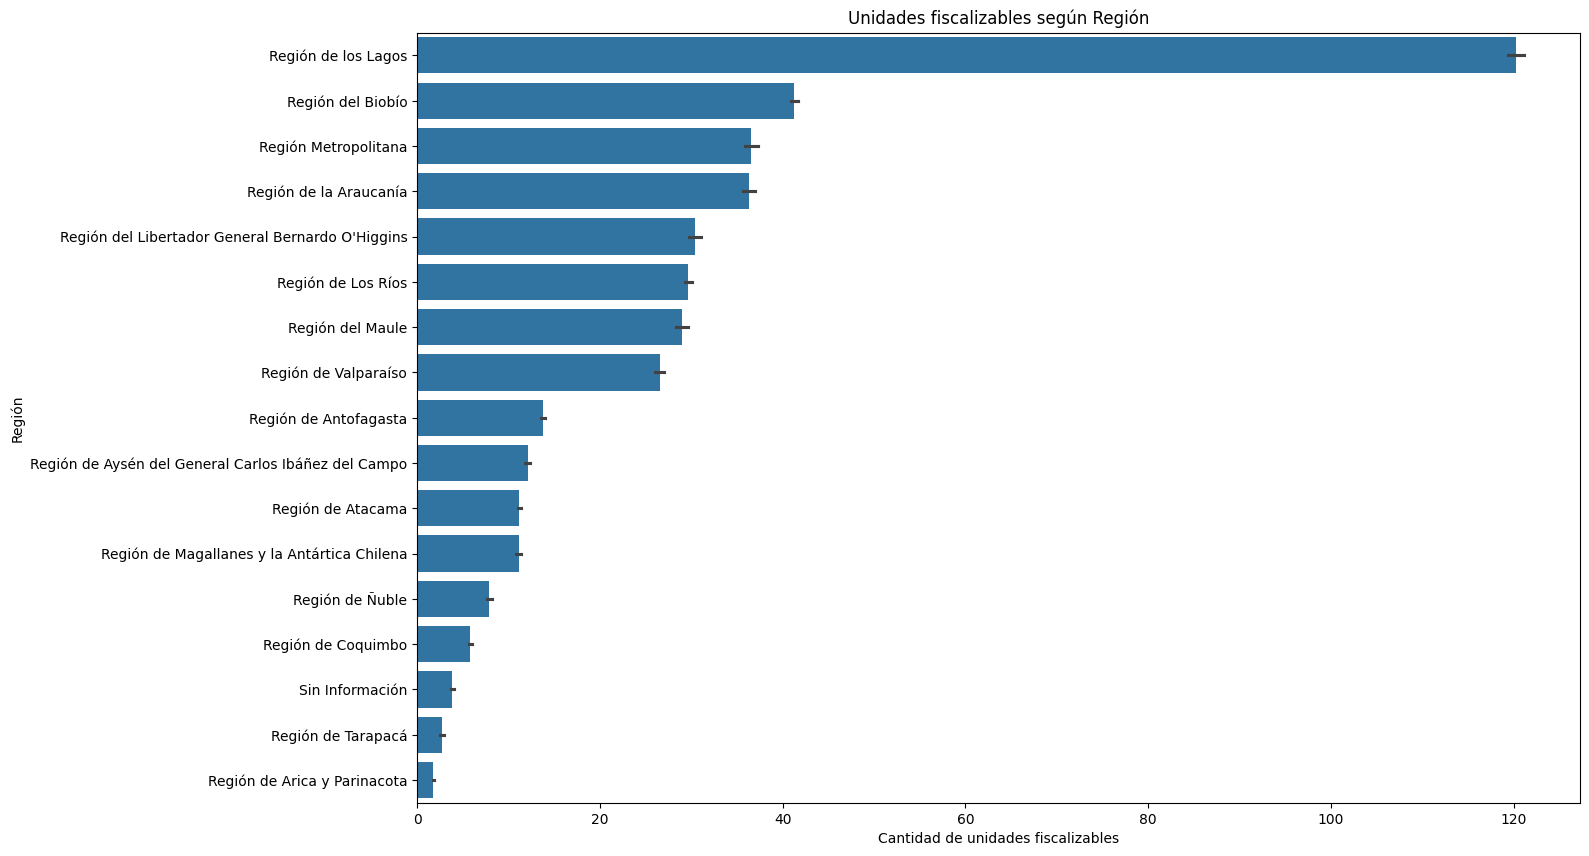

In [ ]:
bar_order = cant_emi[['RegionNombre','UnidadFiscalizable']].groupby(by='RegionNombre').sum().sort_values('UnidadFiscalizable', ascending=False)
cant_emi_reg=cant_emi[['PeriodoInforme','RegionNombre','UnidadFiscalizable']].groupby(by=['PeriodoInforme','RegionNombre']).sum().reset_index()

fig, ax = plt.subplots(1,1, figsize=(15,10) )
sns.barplot( x = 'UnidadFiscalizable', y='RegionNombre', data=cant_emi_reg,order=bar_order.index)
plt.title('Unidades fiscalizables según Región')
plt.xlabel('Cantidad de unidades fiscalizables')
plt.ylabel('Región')
plt.show()

Ahora Visualizamos la cantidad de Unidades fiscalizables totales que hay por cada categoria de producción en un gráfico de barras.

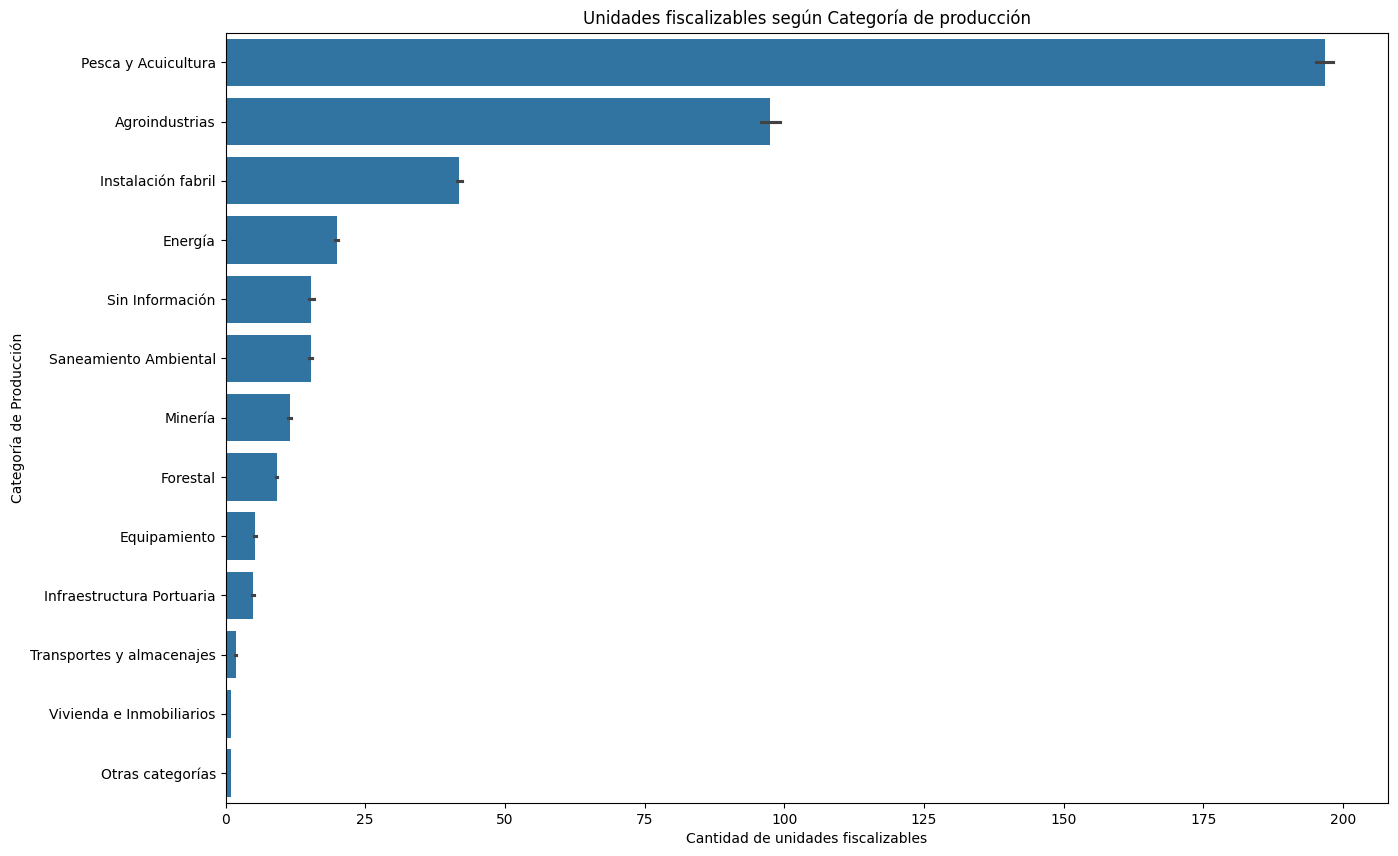

In [ ]:
bar_order = cant_emi[['NombreCategoria','UnidadFiscalizable']].groupby(by='NombreCategoria').sum().sort_values('UnidadFiscalizable', ascending=False)
cant_emi_cat=cant_emi[['PeriodoInforme','NombreCategoria','UnidadFiscalizable']].groupby(by=['PeriodoInforme','NombreCategoria']).sum().reset_index()


fig, ax = plt.subplots(1,1, figsize=(15,10) )
sns.barplot( x = 'UnidadFiscalizable', y='NombreCategoria', data=cant_emi_cat,order=bar_order.index)
plt.title('Unidades fiscalizables según Categoría de producción')
plt.xlabel('Cantidad de unidades fiscalizables')
plt.ylabel('Categoría de Producción')
plt.show()

A partir de estos gráficos, se observa que la mayor cantidad de unidades fiscalizables se encuentra ubicada en la Región de Los Lagos, seguida de lejos por la Región del Biobío, Metropolitana y Araucanía.

Respecto a las categorías de producción, se observa que la mayor cantidad de unidades fiscalizables son del área de la pesca y acuicultura, seguidas de lejos por Agroindustrias, instalaciones fabriles y energía, saneamiento ambiental y minería.

Visualizaremos de manera combinada las categorias de producción y las regiones principales. Para ello, se seleccionan las categorías de producción que tienen mas de 1.000 unidades fiscalizables y las regiones que tienen mas de 2.000 unidades fiscalizables.

In [ ]:
regiones_principales = ['Región de los Lagos', 'Región del Biobío',
                        'Región Metropolitana','Región de la Araucanía',
                        "Región del Libertador General Bernardo O'Higgins",
                        'Región de Los Ríos', 'Región del Maule',
                        'Región de Valparaíso']
categorias_principales = ['Pesca y Acuicultura', 'Agroindustrias',
                          'Instalación fabril', 'Energía',
                          'Saneamiento Ambiental', 'Minería']


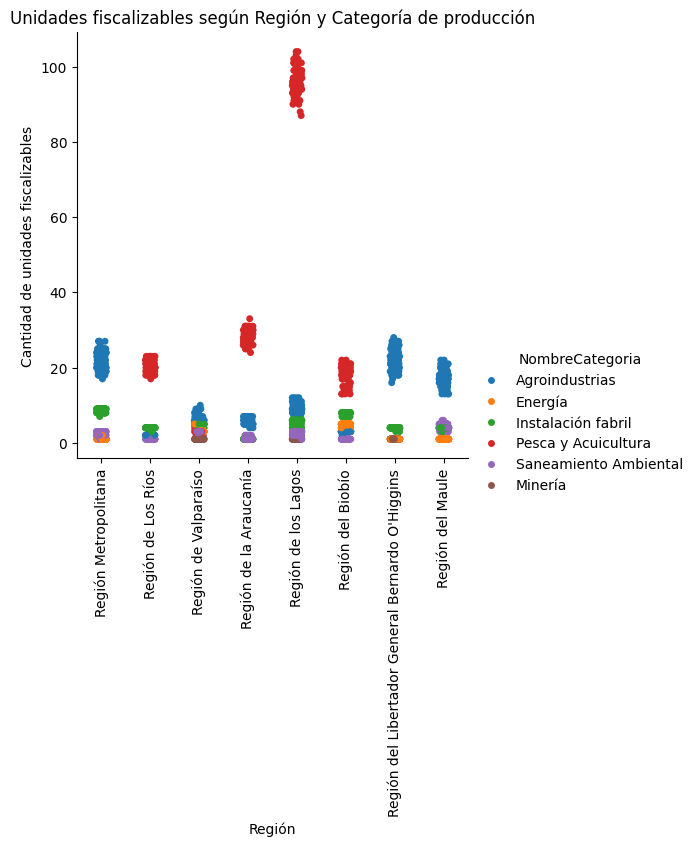

In [ ]:
bool_mayoritarios = (cant_emi['RegionNombre'].isin(regiones_principales)) & (cant_emi['NombreCategoria'].isin(categorias_principales))
cant_emi_mayoritarios= cant_emi.loc[bool_mayoritarios]


sns.catplot(data=cant_emi_mayoritarios, x="RegionNombre", y="UnidadFiscalizable", hue= 'NombreCategoria')
plt.title('Unidades fiscalizables según Región y Categoría de producción')
plt.xlabel('Región')
plt.xticks(rotation=90)
plt.ylabel('Cantidad de unidades fiscalizables')
plt.show()

A partir de este gráfico se observa que la mayor cantidad de unidades fiscalizables se da en la industria de la pesca y acuicultura en la región de Los Lagos.

en las regiones de Bíobio, Araucanía y Los Ríos, la principal actividad también es la pesca y acuicultura.

En las regiones de Valparaíso, Metropolitana, O'Higgins y el Maule la principal actividad es la agroindustria.

### Evolución en el tiempo


Queremos hacer una analisis de si la camntidad e unidades fiscalizables en las principales categorias de industria o regiones han cambiado en el tiempo. Para ello se presentan dos visualizacones de línea.

In [ ]:
cant_emi_reg=cant_emi[['PeriodoInforme','RegionNombre','UnidadFiscalizable']].groupby(by=['PeriodoInforme','RegionNombre']).sum().reset_index()
cant_emi_select = cant_emi_reg.loc[cant_emi_reg['RegionNombre'].isin(regiones_principales)]

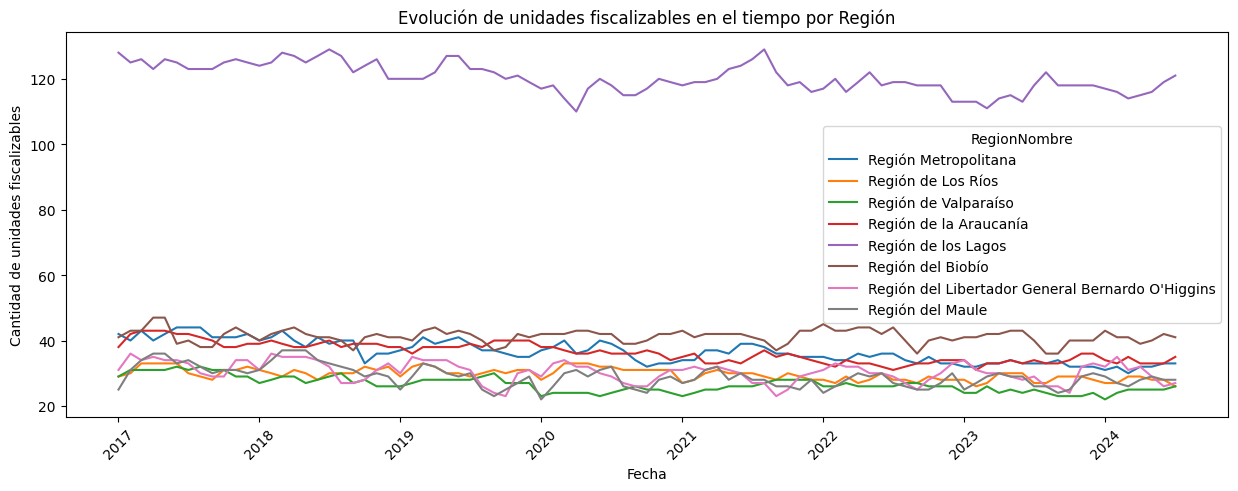

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x='PeriodoInforme', y='UnidadFiscalizable', hue='RegionNombre', data=cant_emi_select)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de unidades fiscalizables')
plt.title('Evolución de unidades fiscalizables en el tiempo por Región')
plt.xticks(rotation=45)
plt.show()

In [ ]:
cant_emi_cat=cant_emi[['PeriodoInforme','NombreCategoria','UnidadFiscalizable']].groupby(by=['PeriodoInforme','NombreCategoria']).sum().reset_index()
cant_emi_select = cant_emi_cat.loc[cant_emi_cat['NombreCategoria'].isin(categorias_principales)]

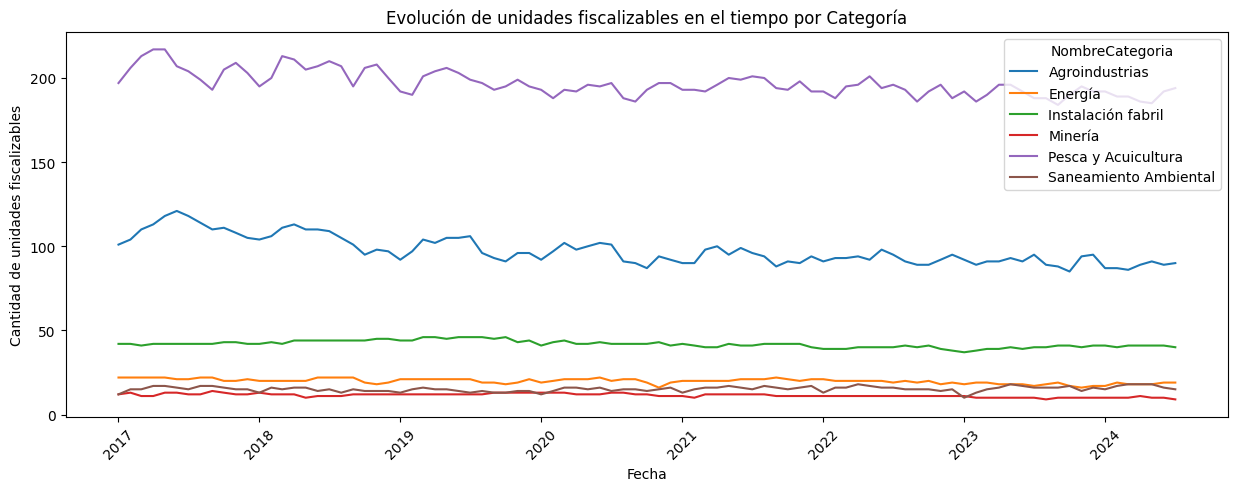

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x='PeriodoInforme', y='UnidadFiscalizable', hue='NombreCategoria', data=cant_emi_select)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de unidades fiscalizables')
plt.title('Evolución de unidades fiscalizables en el tiempo por Categoría')
plt.xticks(rotation=45)
plt.show()

De ambos graficos se observa que la cantidad de unidades fiscalizables tiene una tendencia constante tanto para regiones como para categorías.

Se destaca que la variabilidad en el tiempo de la insucria de pesca y la de agroindustria son mayores que las otras, las que se mantienen con menor variabilidad.

### Selección de datos interesantes

Dada la gran relevancia de los datos de la región de Los Lagos en la categoría de Pesca y Acuicultura, se seleccionan estos datos para hacer un pequeño estudio estadistico descriptivo.


In [ ]:
datos = df_select.loc[(df_select['RegionNombre']=='Región de los Lagos')&(df_select['NombreCategoria']=='Pesca y Acuicultura')]
datos.drop(columns=['RegionNombre', 'RegionId', 'NombreCategoria'], inplace=True)
datos.info()

<ipython-input-20-e13f074537c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos.drop(columns=['RegionNombre', 'RegionId', 'NombreCategoria'], inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 835699 entries, 866 to 4198510
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   PeriodoInforme           835699 non-null  datetime64[ns]
 1   RUT                      835699 non-null  object        
 2   Muestra                  835699 non-null  int64         
 3   MuestraParametro_Codigo  835699 non-null  int64         
 4   Parametro                835699 non-null  object        
 5   Unidad                   835699 non-null  object        
 6   Valor reportado          835699 non-null  float64       
 7   Caudal Muestra (m3/dia)  835699 non-null  float64       
 8   UnidadFiscalizable       835699 non-null  object        
 9   ComunaId                 835699 non-null  float64       
 10  ComunaNombre             835699 non-null  object        
 11  NombreSubCategoria       835699 non-null  object        
 12  Latitud           

In [ ]:
datos.describe()

PeriodoInforme       Muestra  MuestraParametro_Codigo  \
count                         835699  8.356990e+05             8.356990e+05   
mean   2021-08-14 06:03:12.738295040  3.203715e+06             3.719876e+06   
min              2017-01-01 00:00:00  2.909100e+04             6.762160e+05   
25%              2020-05-01 00:00:00  1.505152e+06             2.370634e+06   
50%              2021-12-01 00:00:00  3.372243e+06             3.777941e+06   
75%              2023-04-01 00:00:00  4.910700e+06             5.107188e+06   
max              2024-07-01 00:00:00  6.436113e+06             6.436113e+06   
std                              NaN  2.013905e+06             1.622509e+06   

       Valor reportado  Caudal Muestra (m3/dia)       ComunaId        Latitud  \
count     8.356990e+05             8.356990e+05  835699.000000  835699.000000   
mean      2.023592e+04             2.569452e+04     316.372495     -41.535745   
min       0.000000e+00             0.000000e+00     302.000000     -43.137456   
25%       6.900000e+00             9.090900e+02     313.000000     -41.925083   
50%       8.000000e+00             6.782400e+03     316.000000     -41.514128   
75%       2.130000e+01             2.867300e+04     324.000000     -41.235534   
max       1.600000e+09             9.999999e+06     330.000000     -40.303887   
std       4.966830e+06             1.336515e+05       8.073700       0.545631   

            Longitud  
count  835699.000000  
mean      -72.893217  
min       -73.930272  
25%       -73.198675  
50%       -72.843534  
75%       -72.472528  
max       -72.273364  
std         0.439569

Se hace una tabla pivot para poder visualizar de manera general los datos quimicos de los RILES producidos por la industria de la pesca en la región de Los Lagos.

In [ ]:
datos_quimicos = datos.pivot_table(columns='Parametro', values='Valor reportado', index= 'PeriodoInforme')
datos_quimicos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2017-01-01 to 2024-07-01
Data columns (total 49 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Aceites y Grasas                      91 non-null     float64
 1   Aluminio                              91 non-null     float64
 2   Arsénico                              91 non-null     float64
 3   Boro                                  91 non-null     float64
 4   Cadmio                                91 non-null     float64
 5   Caudal                                91 non-null     float64
 6   Cianuro                               91 non-null     float64
 7   Cloro Libre Residual                  91 non-null     float64
 8   Cloruros                              91 non-null     float64
 9   Cobre                                 91 non-null     float64
 10  Coliformes Fecales o Termotolerantes  91 non-null     float64
 11  C

Se seleccionan unos pocos parámetros fisicoquímicos relevantes para revisar su descripcion estadística.

In [ ]:
datos_quimicos[['pH','Temperatura','Sólidos Suspendidos Totales']].describe()

Parametro         pH  Temperatura  Sólidos Suspendidos Totales
count      91.000000    91.000000                    91.000000
mean        7.154127    14.925265                    30.075638
std         0.068902     2.531374                     8.685830
min         6.993244    10.100859                    18.749744
25%         7.110960    12.962425                    24.605236
50%         7.159312    15.244515                    28.312887
75%         7.199350    16.719042                    32.437997
max         7.291023    19.628384                    77.636977

Se observa que todos estos parametros se encuentran dentro de la norma [DS 90](https://www.bcn.cl/leychile/navegar?idNorma=182637) o [DS 46](https://www.bcn.cl/leychile/navegar?idNorma=206883&idParte=).